In [105]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
feature_id = 2
CONVERTED_DATABASE_NAME = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt.sqlite'
SUMMED_REGIONS_DATABASE = '/home/ubuntu/HeLa_20KInt/HeLa_20KInt-features-{}-{}.sqlite'.format(feature_id, feature_id)

In [143]:
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
summed_ms1_region_df = pd.read_sql_query("select * from summed_ms1_regions where feature_id={} order by peak_id".format(feature_id), db_conn)
db_conn.close()

In [144]:
summed_ms1_region_df.head()

,feature_id,point_id,mz,retention_time_secs,scan,intensity,number_frames,peak_id,feature_point
0,2,1,624.809540,1085.193984,565,152109,4,1,2|1
1,2,5,624.807781,1085.164251,566,152259,4,1,2|5
2,2,9,624.808681,1085.247289,567,157273,3,1,2|9
3,2,13,624.808552,1085.172534,568,167168,4,1,2|13
4,2,17,624.809271,1085.183310,569,182997,4,1,2|17


In [145]:
summed_ms1_region_df.rename(columns={"peak_id":"feature_peak_id","point_id":"feature_point_id"}, inplace=True)

In [146]:
summed_ms1_region_df.drop(['mz', 'scan', 'intensity', 'number_frames'], axis=1, inplace=True)

In [147]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,retention_time_secs,feature_peak_id,feature_point
0,2,1,1085.193984,1,2|1
1,2,5,1085.164251,1,2|5
2,2,9,1085.247289,1,2|9
3,2,13,1085.172534,1,2|13
4,2,17,1085.183310,1,2|17


In [148]:
# add the summed_frame_point that contributed to each feature region point
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
ms1_feature_frame_join_df = pd.read_sql_query("select * from ms1_feature_frame_join where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [149]:
ms1_feature_frame_join_df.head()

,feature_id,feature_point_id,frame_id,frame_point_id,feature_point,summed_frame_point
0,2,1,460,73305,2|1,460|73305
1,2,1,461,77557,2|1,461|77557
2,2,1,464,76541,2|1,464|76541
3,2,1,465,75306,2|1,465|75306
4,2,2,460,73306,2|2,460|73306


In [150]:
ms1_feature_frame_join_df.rename(columns={"frame_id":"summed_frame_id"}, inplace=True)

In [151]:
ms1_feature_frame_join_df.drop(['feature_id', 'feature_point_id', 'frame_point_id'], axis=1, inplace=True)

In [152]:
ms1_feature_frame_join_df.head()

,summed_frame_id,feature_point,summed_frame_point
0,460,2|1,460|73305
1,461,2|1,461|77557
2,464,2|1,464|76541
3,465,2|1,465|75306
4,460,2|2,460|73306


In [153]:
summed_ms1_region_df = pd.merge(summed_ms1_region_df, ms1_feature_frame_join_df, how='left', left_on=['feature_point'], right_on=['feature_point'])

In [154]:
summed_ms1_region_df.drop(['feature_point'], axis=1, inplace=True)

In [155]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,retention_time_secs,feature_peak_id,summed_frame_id,summed_frame_point
0,2,1,1085.193984,1,460,460|73305
1,2,1,1085.193984,1,461,461|77557
2,2,1,1085.193984,1,464,464|76541
3,2,1,1085.193984,1,465,465|75306
4,2,5,1085.164251,1,460,460|73450


In [156]:
# add the raw_frame_point that contributed to each summed frame point
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
raw_summed_join_df = pd.read_sql_query("select * from raw_summed_join where summed_frame_point in {}".format(tuple(summed_ms1_region_df.summed_frame_point.astype(str))), db_conn)
db_conn.close()

In [157]:
raw_summed_join_df.head()

,summed_frame_id,summed_point_id,raw_frame_id,raw_point_id,summed_frame_point,raw_frame_point
0,457,60412,10018,78304,457|60412,10018|78304
1,457,60412,10040,87682,457|60412,10040|87682
2,457,60412,10051,94893,457|60412,10051|94893
3,457,60848,10040,88160,457|60848,10040|88160
4,457,60848,10051,95503,457|60848,10051|95503


In [158]:
summed_ms1_region_df = pd.merge(summed_ms1_region_df, raw_summed_join_df, how='left', left_on=['summed_frame_point'], right_on=['summed_frame_point'])

In [159]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,retention_time_secs,feature_peak_id,summed_frame_id_x,summed_frame_point,summed_frame_id_y,summed_point_id,raw_frame_id,raw_point_id,raw_frame_point
0,2,1,1085.193984,1,460,460|73305,460,73305,10084,107652,10084|107652
1,2,1,1085.193984,1,460,460|73305,460,73305,10084,107653,10084|107653
2,2,1,1085.193984,1,460,460|73305,460,73305,10095,95514,10095|95514
3,2,1,1085.193984,1,460,460|73305,460,73305,10106,101492,10106|101492
4,2,1,1085.193984,1,460,460|73305,460,73305,10117,109435,10117|109435


In [160]:
summed_ms1_region_df.drop(['summed_frame_id_x','summed_frame_id_y','summed_frame_point','retention_time_secs'], axis=1, inplace=True)

In [161]:
# get the raw frame point's intensity
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
raw_frames_df = pd.read_sql_query("select * from frames where raw_frame_point in {}".format(tuple(summed_ms1_region_df.raw_frame_point.astype(str))), db_conn)
db_conn.close()

In [162]:
summed_ms1_region_df = pd.merge(summed_ms1_region_df, raw_frames_df, how='left', left_on=['raw_frame_point'], right_on=['raw_frame_point'])

In [163]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,feature_peak_id,summed_point_id,raw_frame_id,raw_point_id,raw_frame_point,frame_id,point_id,mz,scan,intensity,peak_id,retention_time_secs
0,2,1,1,73305,10084,107652,10084|107652,10084,107652,624.806146,565,12240,0,1082.266821
1,2,1,1,73305,10084,107653,10084|107653,10084,107653,624.833735,565,2646,0,1082.266821
2,2,1,1,73305,10095,95514,10095|95514,10095,95514,624.806146,565,12240,0,1083.447978
3,2,1,1,73305,10106,101492,10106|101492,10106,101492,624.810087,565,24929,0,1084.631752
4,2,1,1,73305,10117,109435,10117|109435,10117,109435,624.810087,565,24929,0,1085.810582


In [164]:
summed_ms1_region_df.drop(['peak_id','frame_id','raw_frame_point','point_id'], axis=1, inplace=True)

In [165]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,feature_peak_id,summed_point_id,raw_frame_id,raw_point_id,mz,scan,intensity,retention_time_secs
0,2,1,1,73305,10084,107652,624.806146,565,12240,1082.266821
1,2,1,1,73305,10084,107653,624.833735,565,2646,1082.266821
2,2,1,1,73305,10095,95514,624.806146,565,12240,1083.447978
3,2,1,1,73305,10106,101492,624.810087,565,24929,1084.631752
4,2,1,1,73305,10117,109435,624.810087,565,24929,1085.810582


In [166]:
# for each feature peak, use the raw points to find the RT and drift intensity-weighted centroids
peak_ids = summed_ms1_region_df.feature_peak_id.unique()

In [167]:
import peakutils
for peak_id in peak_ids:
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    centroid_scan = peakutils.centroid(peak_points_df.scan.astype(float), peak_points_df.intensity)
    centroid_rt = peakutils.centroid(peak_points_df.retention_time_secs.astype(float), peak_points_df.intensity)
    centroid_mz = peakutils.centroid(peak_points_df.mz.astype(float), peak_points_df.intensity)
    print("peak {}, scan {}, rt {}, mz {}".format(peak_id, centroid_scan, centroid_rt, centroid_mz))

peak 1, scan 574.123492106, rt 1085.74628156, mz 624.809082916
peak 2, scan 574.343241729, rt 1086.13555939, mz 625.309056093
peak 3, scan 573.666259018, rt 1085.08016363, mz 625.811608159
peak 4, scan 575.797794899, rt 1084.33123485, mz 626.311047152


In [168]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

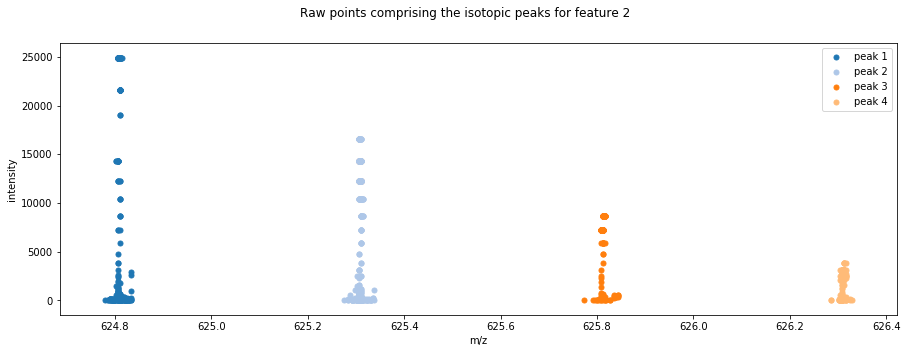

In [169]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

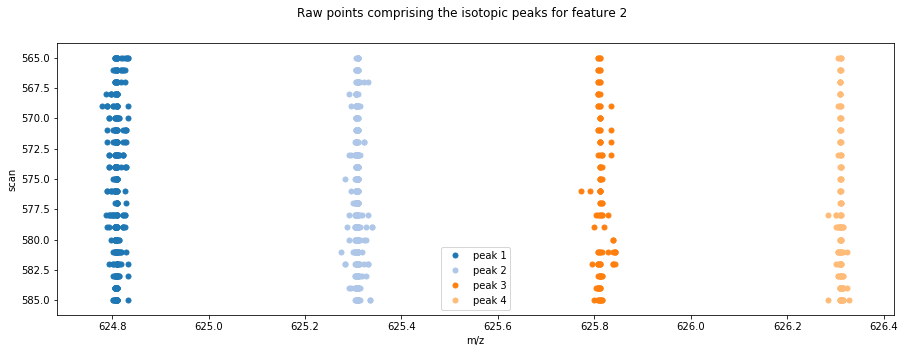

In [170]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.scan, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

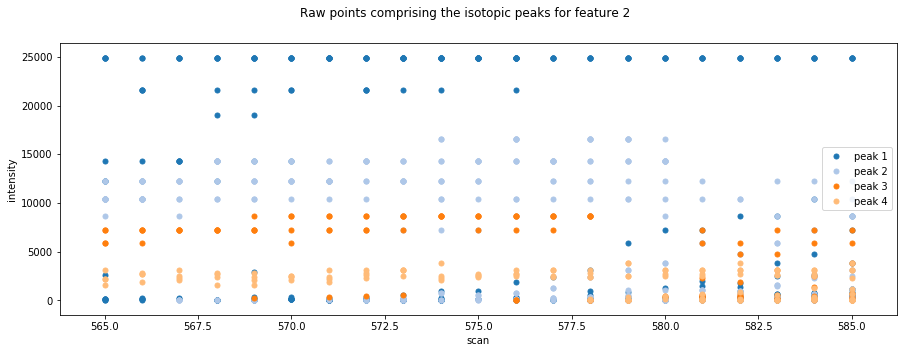

In [171]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.scan, peak_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('scan')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

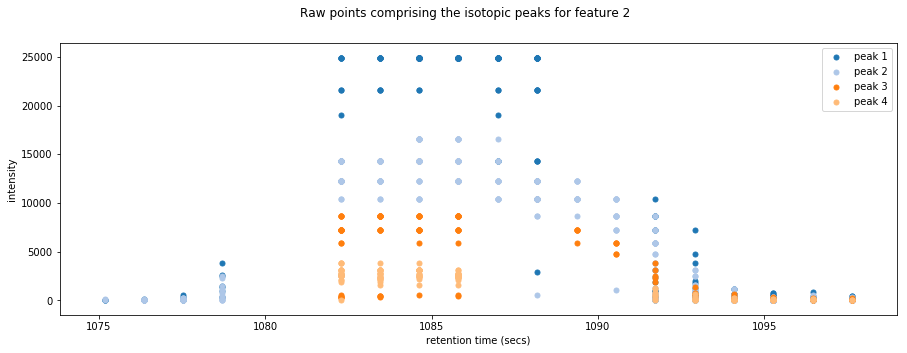

In [172]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id].copy()
    peak_points_df.sort_values(by=['raw_frame_id'], inplace=True)
    ax.plot(peak_points_df.retention_time_secs, peak_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

In [173]:
summed_ms1_region_df.head()

,feature_id,feature_point_id,feature_peak_id,summed_point_id,raw_frame_id,raw_point_id,mz,scan,intensity,retention_time_secs
0,2,1,1,73305,10084,107652,624.806146,565,12240,1082.266821
1,2,1,1,73305,10084,107653,624.833735,565,2646,1082.266821
2,2,1,1,73305,10095,95514,624.806146,565,12240,1083.447978
3,2,1,1,73305,10106,101492,624.810087,565,24929,1084.631752
4,2,1,1,73305,10117,109435,624.810087,565,24929,1085.810582


In [174]:
summed_ms1_region_df.rename(columns={"retention_time_secs":"rt"}, inplace=True)

In [175]:
# get the raw frame point's intensity
min_mz = summed_ms1_region_df.mz.min()
max_mz = summed_ms1_region_df.mz.max()
min_scan = summed_ms1_region_df.scan.min()
max_scan = summed_ms1_region_df.scan.max()
min_rt = summed_ms1_region_df.rt.min()
max_rt = summed_ms1_region_df.rt.max()

db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
raw_points_in_region_df = pd.read_sql_query("select * from frames where retention_time_secs >= {} and retention_time_secs <= {} and scan >= {} and scan <= {} and mz >= {} and mz <= {}".format(min_rt, max_rt, min_scan, max_scan, min_mz, max_mz), db_conn)
db_conn.close()

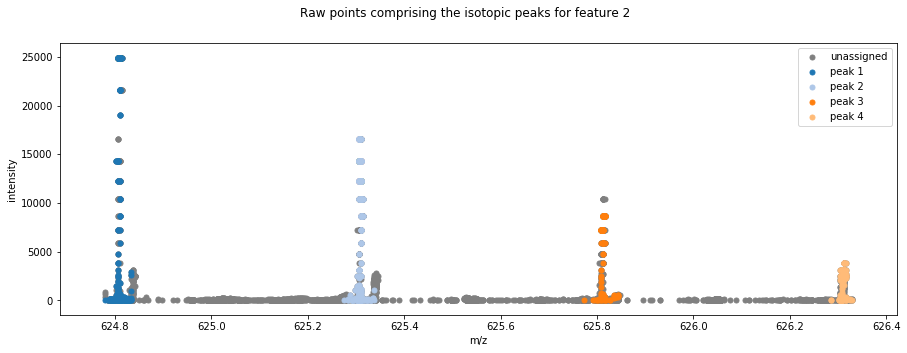

In [176]:
f, ax = plt.subplots()
ax.plot(raw_points_in_region_df.mz, raw_points_in_region_df.intensity, marker='o', color='grey', linestyle='', ms=5, label="unassigned")
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.intensity, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()

In [ ]:
f, ax = plt.subplots()
ax.plot(raw_points_in_region_df.mz, raw_points_in_region_df.scan, marker='o', color='grey', alpha=0.2, linestyle='', ms=5, label="unassigned")
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms1_region_df.loc[summed_ms1_region_df.feature_peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.scan, marker='o', color=tableau20[idx], linestyle='', ms=5, label="peak {}".format(peak_id))
# plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw points comprising the isotopic peaks for feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()